In [23]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import multiprocessing as mp
import time
import glob
import re
import random
from sklearn.model_selection import train_test_split
import torch

sys.path.insert(0, '/Data/user/panhailin/git_lab/npspy')
import npspy as nps
from npspy import npsc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def get_metrics_from_pred_proba_df(
    pred_proba_df: pd.DataFrame,
) -> pd.DataFrame:
    """
    Calculate various metrics from a DataFrame of predicted probabilities.
    Args:
        pred_proba_df (pd.DataFrame): DataFrame containing predicted probabilities and true labels.
    Returns:
        pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    metrics = {
        'accuracy': [npsc.get_acc_from_pred_proba_df(pred_proba_df)],
        'precision': [npsc.get_precision_from_pred_proba_df(pred_proba_df)],
        'recall': [npsc.get_recall_from_pred_proba_df(pred_proba_df)],
        'f1_score': [npsc.get_f1_from_pred_proba_df(pred_proba_df)],
        'jaccard_score': [npsc.get_jaccard_score_from_pred_proba_df(pred_proba_df)],
        'auroc': [npsc.get_auroc_from_pred_proba_df(pred_proba_df)],
    }

    metrics_df = pd.DataFrame(metrics)

    return metrics_df

In [24]:
metrics_dfs = []
# data_sizes = [14000, 12000, 10000, 8000, 6000]
data_sizes = [25000, 20000, 15000, 10000, 5000]
for ds in data_sizes:
    pred_proba_df = pd.read_csv(f"../../../03.results/classification_on_clean_data/hp12/diff_data_size/clean/clean_data_ds_{ds}_pred_proba.csv", index_col=0)
    metrics_df = get_metrics_from_pred_proba_df(pred_proba_df)
    metrics_df.index = [f'clean_{ds}']
    metrics_dfs.append(metrics_df)

for ds in data_sizes:
    pred_proba_df = pd.read_csv(f"../../../03.results/classification_on_clean_data/hp12/diff_data_size/valid/valid_data_ds_{ds}_pred_proba.csv", index_col=0)
    metrics_df = get_metrics_from_pred_proba_df(pred_proba_df)
    metrics_df.index = [f'valid_{ds}']
    metrics_dfs.append(metrics_df)

metrics_df = pd.concat(metrics_dfs)
metrics_df

,accuracy,precision,recall,f1_score,jaccard_score,auroc
clean_25000,0.952322,0.952514,0.952322,0.952378,0.909924,0.995792
clean_20000,0.940056,0.940286,0.940056,0.940113,0.888158,0.994952
clean_15000,0.938778,0.939121,0.938778,0.938889,0.886159,0.995268
clean_10000,0.935567,0.935910,0.935567,0.935684,0.880660,0.995146
clean_5000,0.912622,0.914008,0.912622,0.912984,0.842288,0.993752
valid_25000,0.934222,0.934542,0.934222,0.934331,0.877600,0.993770
valid_20000,0.930289,0.930636,0.930289,0.930344,0.870706,0.994106
valid_15000,0.923078,0.923614,0.923078,0.923245,0.858618,0.994007
valid_10000,0.916567,0.917483,0.916567,0.916834,0.847990,0.993123
valid_5000,0.896489,0.897699,0.896489,0.896760,0.814795,0.991383


<PolarAxes: >

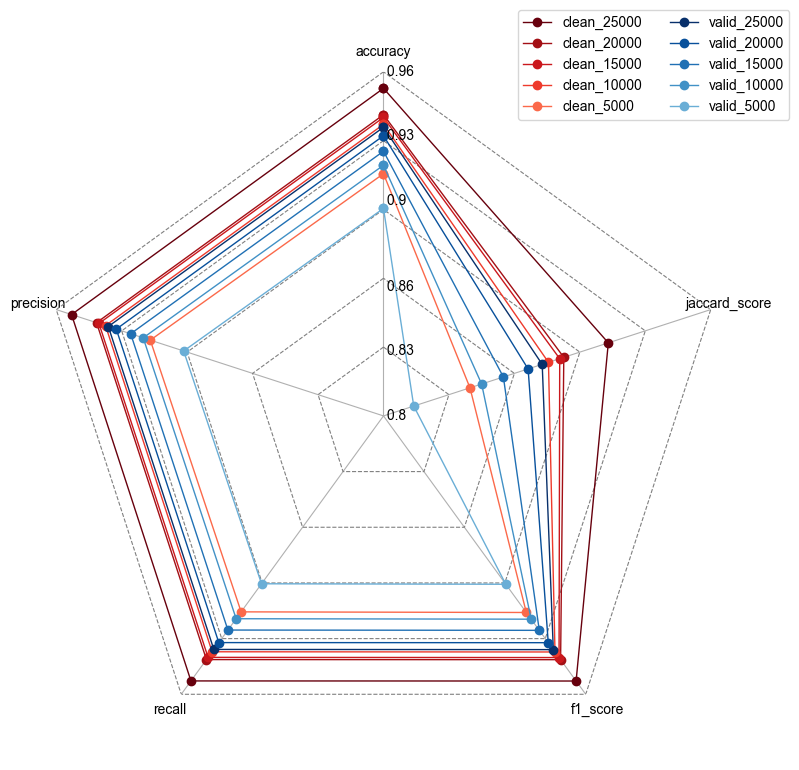

In [26]:
npsc.draw_radar_plot_with_two_cmps(metrics_df.iloc[:,0:5], y_min=0.80, y_max=0.96)

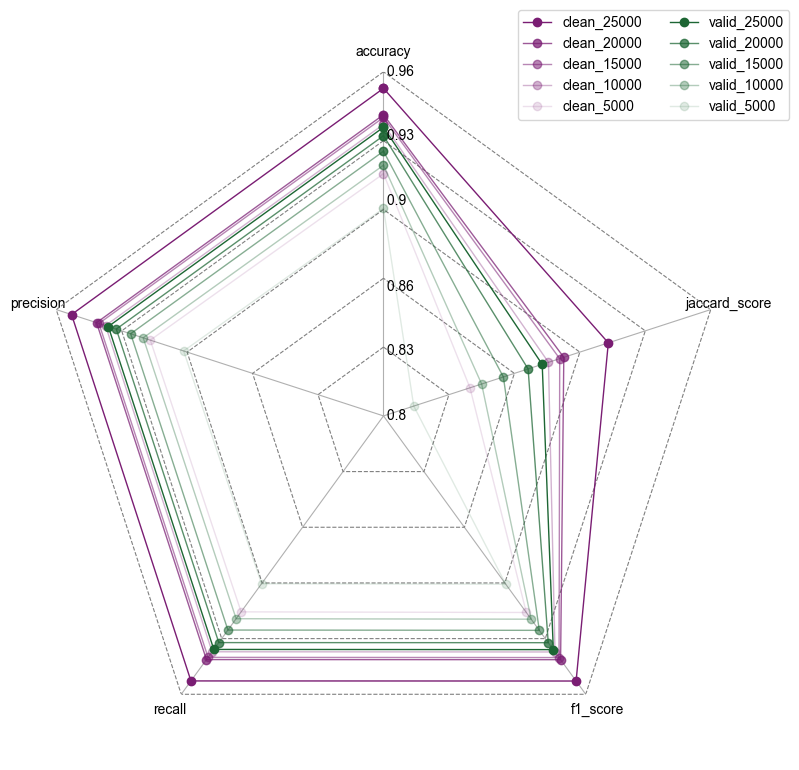

In [28]:
npsc.draw_radar_plot(metrics_df.iloc[:,0:5], y_min=0.80, y_max=0.96, 
                     colors=['#7A1D73FF', '#7A1D73BB', '#7A1D7388', '#7A1D7355', '#7A1D7322',
                             '#1D6634FF', '#1D6634BB', '#1D663488', '#1D663455', '#1D663422',]
                    )
plt.savefig("../../../05.figures/classification/hp12/diff_ds_rada_plot.pdf", bbox_inches='tight')